### Task Description

В цехе находятся 2 станка.
В цех поступают детали в среднем через каждые 35 минут (здесь и далее подразумевается, что все времена распределены экспоненциально). 
Обработка детали производится на одном из двух станков.
Первый обрабатывает деталь в среднем за 30 минут, при этом отвергает 10 % деталей, считая их бракованными.
Второй обрабатывает деталь в среднем за 50 минут, при этом отвергает 20 % деталей, считая их бракованными.
Если деталь была забракована в первый раз, то ее попробуют обработать еще раз после всех деталей, стоящих в очереди (будь то в очереди на первичную или вторичную обработку)
Детали, которые были отвергнуты 2 раза, считаются отходами и не обслуживаются цехом.
Детали, которые были отвергнуты на любом станке передаются на повторную обработку на второй станок. 
Моделирование проводится на 500 деталей.


Каждый из станков имеет цену обработки (или попытки обработки) детали. 
Для первого станка цена обработки составляет 5$. Для второго - 2$.
Цена готового изделия составляет 12 долларов.

Предпринимателю, который владеет цехом, поступило предложение об обмене второго станка. Новый станок имеет цену обработки в 3 $. Время обработки - 40 минут в среднем. Вероятность браковки - 10%.

Задача: выяснить какой из станков (старый 2-й или новый) будет более выгодный?
а) прибыль
б) прибыль \ сек

In [1]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Variables

In [2]:
# constants
n = 500
price_for_item = 12 # $

work_price_first_machine = 5 # $
work_price_second_machine = 2 # $
work_price_third_machine = 3 # $

decline_first_machine = 10 # %
decline_second_machine = 20 # %
decline_third_machine = 10 # %

arrival_rate = 35 # min
first_machine_speed = 30 # min
second_machine_speed = 50 # min
third_machine_speed = 40 # min

first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

# simulation variables
x = list(range(n))
current_time = 0
first_machine_time = 0
second_machine_time = 0

# collections of elements
customers_time_copy = []
customers_status_copy = []

customers_time = [] # arrive times distributed exponentially will be stored here
customers_status = [] # str variable for each

### Arrival times generation

In [3]:
def get_random_arrival_time():
    return round(random.expovariate(1.0/arrival_rate))

In [4]:
def get_service_time_value(service_rate):
    return round(random.expovariate(1.0 / service_rate))

Array of times between arrivals:
[10, 53, 42, 60, 40, 94, 87, 23, 10, 50, 90, 60, 42, 15, 22, 19, 25, 95, 23, 9, 25, 26, 24, 138, 3, 1, 127, 21, 101, 54, 75, 29, 28, 15, 40, 46, 5, 15, 26, 30, 16, 0, 24, 29, 3, 5, 29, 52, 15, 2, 15, 25, 27, 54, 10, 0, 131, 83, 31, 36, 42, 33, 49, 2, 8, 34, 50, 2, 33, 1, 79, 1, 30, 20, 156, 84, 20, 15, 40, 66, 37, 45, 10, 17, 182, 27, 25, 46, 4, 52, 7, 120, 137, 9, 25, 6, 61, 88, 8, 45, 13, 17, 55, 20, 30, 11, 19, 7, 11, 76, 22, 43, 114, 14, 29, 4, 3, 4, 11, 47, 14, 42, 23, 87, 11, 23, 63, 55, 13, 5, 8, 43, 17, 13, 121, 45, 62, 84, 22, 10, 25, 0, 11, 20, 32, 2, 15, 22, 50, 9, 11, 60, 35, 56, 14, 7, 53, 22, 27, 55, 41, 38, 40, 1, 2, 4, 2, 29, 116, 3, 22, 146, 74, 1, 132, 2, 20, 9, 19, 22, 170, 42, 4, 8, 22, 150, 35, 91, 34, 41, 43, 6, 73, 8, 27, 2, 5, 70, 23, 10, 35, 15, 33, 35, 24, 52, 16, 5, 7, 24, 7, 11, 12, 18, 10, 23, 34, 64, 2, 5, 32, 57, 11, 48, 42, 42, 2, 2, 19, 6, 9, 15, 13, 34, 15, 25, 12, 1, 15, 74, 41, 16, 10, 77, 77, 83, 80, 100, 122, 46, 10

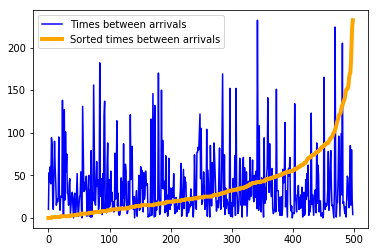

In [5]:
customers_time = []

def through_time_generation():
    curr_time = 0
    waiting_time = 0

    for i in x:
        waiting_time = get_random_arrival_time()
        customers_time.append(curr_time + waiting_time)
        curr_time += waiting_time

## this works incorrectly
## because sometimes time is going in other direction
def through_const_generation():
    value = 0
    
    for i in x:
        value = get_random_arrival_time()
        customers_time.append(i * arrival_rate + value)

## HERE I'M CALLING FUNCTION
## THAT IS WORKING IN THIS WAY:
## every iteration generating exp-distributed value with rate=35 (lambda = 1/rate)
## and curr_time_{i} has sum of all generated waiting_times (on previous row) till i-th iteration 

through_time_generation()
#through_const_generation()

between_arrival_times = []
for i in range(1, n):
    between_arrival_times.append(customers_time[i] - customers_time[i-1])

print('Array of times between arrivals:')
print(between_arrival_times)
print('\n\nE(x) of times between arrivals')
print(sum(between_arrival_times)/n)
    
fig, ax = plt.subplots()
ax.plot(range(n - 1), between_arrival_times, label = 'Times between arrivals', color='blue')

sorted_between_arrival_times = sorted(between_arrival_times)

ax.plot(range(n - 1), sorted_between_arrival_times, label = 'Sorted times between arrivals', linewidth= 4, color='orange')
ax.legend()
plt.show()

## Setup for other variables states

In [6]:
for i in x:
    customers_status.append('arrive')

## setting all initial times to status 'arrive'

## Functions Implementation

In [7]:
# choose machine
def number_of_machine_to_work_on():
    rnd = random.random()
    if (rnd < 0.5):
        print('goes to machine #1 in experiment')
        return 1
    else:
        print('goes to machine #2 in experiment')
        return 2

In [8]:
# returns true if machine doesn't decline item
def work_with_item(percentage_for_decline):
    r = random.random()
    
    if (r < percentage_for_decline / 100):
        return 0
    return 1

In [9]:
def first_machine():
    global current_time
    global first_success_amount
    global first_reject_amount
    global first_machine_time
    
    print('current_time = ', current_time)
    print('first_machine_time = ', first_machine_time)

    if (work_with_item(decline_first_machine)):
        first_success_amount += 1
        
        if (first_machine_time <= current_time):
            # work is done for this item
            first_machine_time = current_time + get_service_time_value(first_machine_speed)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            first_machine_time += get_service_time_value(first_machine_speed)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
    else:
        first_reject_amount += 1
        customers_time.append(first_machine_time)
        customers_status.append('repeat')

In [10]:
def second_machine(isRepeating):
    global current_time
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global garbage_amount
    
    print('current_time = ', current_time)
    print('second_machine_time = ', second_machine_time)
    
    if (work_with_item(decline_second_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(second_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(second_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
            return
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

In [11]:
def third_machine(isRepeating):
    global current_time
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global garbage_amount
    
    print('current_time = ', current_time)
    print('second_machine_time = ', second_machine_time)
    
    if (work_with_item(decline_third_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(third_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(third_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
            return
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

## Simulation with machine №2

In [12]:
i = 0 # current arrival that is supported

customers_time_copy = customers_time.copy()
customers_status_copy = customers_status.copy()

while (i < len(customers_time)):
    print('Item # ', i)
    
    if (i < n):
        current_time = customers_time[i]
    
    # we have to synchronize 2-nd machine and current time
    if (i == n):
        print('amount of works done on 2nd machine before repeating:', second_success_amount + second_reject_amount)
        print('first_machine_time = ', first_machine_time)
        print('second_machine_time = ', second_machine_time)
        print('current_time = ', current_time)
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        print('arrive')
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            second_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        print('finished')
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        print('repeat')
        second_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'garbage'):
        print('garbage')
        garbage_amount += 1
        
    i += 1

Item #  0
arrive
goes to machine #1 in experiment
current_time =  26
first_machine_time =  0
Item #  1
arrive
goes to machine #2 in experiment
current_time =  36
second_machine_time =  0
Item #  2
arrive
goes to machine #2 in experiment
current_time =  89
second_machine_time =  148
Item #  3
arrive
goes to machine #1 in experiment
current_time =  131
first_machine_time =  47
Item #  4
arrive
goes to machine #1 in experiment
current_time =  191
first_machine_time =  269
Item #  5
arrive
goes to machine #1 in experiment
current_time =  231
first_machine_time =  373
Item #  6
arrive
goes to machine #1 in experiment
current_time =  325
first_machine_time =  412
Item #  7
arrive
goes to machine #1 in experiment
current_time =  412
first_machine_time =  449
Item #  8
arrive
goes to machine #2 in experiment
current_time =  435
second_machine_time =  165
Item #  9
arrive
goes to machine #2 in experiment
current_time =  445
second_machine_time =  604
Item #  10
arrive
goes to machine #2 in expe

second_machine_time =  13221
Item #  358
arrive
goes to machine #1 in experiment
current_time =  13277
first_machine_time =  13277
Item #  359
arrive
goes to machine #1 in experiment
current_time =  13338
first_machine_time =  13278
Item #  360
arrive
goes to machine #2 in experiment
current_time =  13479
second_machine_time =  13252
Item #  361
arrive
goes to machine #1 in experiment
current_time =  13556
first_machine_time =  13351
Item #  362
arrive
goes to machine #1 in experiment
current_time =  13586
first_machine_time =  13569
Item #  363
arrive
goes to machine #2 in experiment
current_time =  13673
second_machine_time =  13252
Item #  364
arrive
goes to machine #1 in experiment
current_time =  13714
first_machine_time =  13635
Item #  365
arrive
goes to machine #2 in experiment
current_time =  13750
second_machine_time =  13752
Item #  366
arrive
goes to machine #2 in experiment
current_time =  13775
second_machine_time =  13820
Item #  367
arrive
goes to machine #1 in experime

current_time =  18107
second_machine_time =  20177
Item #  821
finished
Item #  822
finished
Item #  823
finished
Item #  824
finished
Item #  825
finished
Item #  826
finished
Item #  827
repeat
current_time =  18107
second_machine_time =  20184
Item #  828
finished
Item #  829
finished
Item #  830
finished
Item #  831
finished
Item #  832
finished
Item #  833
finished
Item #  834
finished
Item #  835
finished
Item #  836
finished
Item #  837
repeat
current_time =  18107
second_machine_time =  20221
Item #  838
finished
Item #  839
finished
Item #  840
finished
Item #  841
finished
Item #  842
finished
Item #  843
repeat
current_time =  18107
second_machine_time =  20311
Item #  844
finished
Item #  845
finished
Item #  846
repeat
current_time =  18107
second_machine_time =  20336
Item #  847
finished
Item #  848
finished
Item #  849
finished
Item #  850
finished
Item #  851
finished
Item #  852
finished
Item #  853
finished
Item #  854
finished
Item #  855
finished
Item #  856
finish

## Results

In [13]:
current_time = second_machine_time

print('Rejects: first [', first_reject_amount, '], second [', second_reject_amount, ']')
print('Successes: first [', first_success_amount, '], second [', second_success_amount, ']')
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

print('Time spent: ', current_time, 'seconds')

money_earned = price_for_item * (finished_amount)

money_spent = work_price_first_machine * (first_success_amount + first_reject_amount)
money_spent += work_price_second_machine * (second_success_amount + second_reject_amount)

profit = money_earned - money_spent

print('Money earned: ', money_earned, '$')
print('Money spent: ', money_spent, '$')

print('Profit money: ', profit, '$')
print('Profit($)\sec:', profit / current_time)

Rejects: first [ 35 ], second [ 36 ]
Successes: first [ 242 ], second [ 243 ]
Garbage items:  15
Finishes:  485
Repeats:  71
Time spent:  20941 seconds
Money earned:  5820 $
Money spent:  1943 $
Profit money:  3877 $
Profit($)\sec: 0.18513920061124112


## Simulation with machine №3

In [14]:
first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

second_machine_time = 0
first_machine_time = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

current_time = 0

i = 0 # current arrival that is supported

customers_time = customers_time_copy
customers_status = customers_status_copy

while (i < len(customers_time)):
    print('Item # ', i)
        
    if (i < n):
        current_time = customers_time[i]
    
    # we have to synchronize 2-nd machine and current time
    if (i == n):
        print('amount of works done on 2nd machine before repeating:', second_success_amount + second_reject_amount)
        print('first_machine_time = ', first_machine_time)
        print('second_machine_time = ', second_machine_time)
        print('current_time = ', current_time)
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        print('arrive')
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            third_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        print('finished')
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        print('repeat')
        third_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'garbage'):
        print('garbage')
        garbage_amount += 1
        
    i += 1

Item #  0
arrive
goes to machine #2 in experiment
current_time =  26
second_machine_time =  0
Item #  1
arrive
goes to machine #2 in experiment
current_time =  36
second_machine_time =  28
Item #  2
arrive
goes to machine #2 in experiment
current_time =  89
second_machine_time =  36
Item #  3
arrive
goes to machine #1 in experiment
current_time =  131
first_machine_time =  0
Item #  4
arrive
goes to machine #2 in experiment
current_time =  191
second_machine_time =  118
Item #  5
arrive
goes to machine #2 in experiment
current_time =  231
second_machine_time =  211
Item #  6
arrive
goes to machine #1 in experiment
current_time =  325
first_machine_time =  148
Item #  7
arrive
goes to machine #1 in experiment
current_time =  412
first_machine_time =  339
Item #  8
arrive
goes to machine #2 in experiment
current_time =  435
second_machine_time =  248
Item #  9
arrive
goes to machine #2 in experiment
current_time =  445
second_machine_time =  514
Item #  10
arrive
goes to machine #2 in ex

Item #  153
arrive
goes to machine #1 in experiment
current_time =  5630
first_machine_time =  5597
Item #  154
arrive
goes to machine #2 in experiment
current_time =  5686
second_machine_time =  5560
Item #  155
arrive
goes to machine #1 in experiment
current_time =  5700
first_machine_time =  5644
Item #  156
arrive
goes to machine #1 in experiment
current_time =  5707
first_machine_time =  5644
Item #  157
arrive
goes to machine #2 in experiment
current_time =  5760
second_machine_time =  5560
Item #  158
arrive
goes to machine #2 in experiment
current_time =  5782
second_machine_time =  5560
Item #  159
arrive
goes to machine #1 in experiment
current_time =  5809
first_machine_time =  5748
Item #  160
arrive
goes to machine #1 in experiment
current_time =  5864
first_machine_time =  5867
Item #  161
arrive
goes to machine #2 in experiment
current_time =  5905
second_machine_time =  5794
Item #  162
arrive
goes to machine #1 in experiment
current_time =  5943
first_machine_time =  5

arrive
goes to machine #1 in experiment
current_time =  9149
first_machine_time =  9174
Item #  254
arrive
goes to machine #1 in experiment
current_time =  9182
first_machine_time =  9174
Item #  255
arrive
goes to machine #2 in experiment
current_time =  9236
second_machine_time =  9169
Item #  256
arrive
goes to machine #1 in experiment
current_time =  9274
first_machine_time =  9174
Item #  257
arrive
goes to machine #1 in experiment
current_time =  9284
first_machine_time =  9290
Item #  258
arrive
goes to machine #2 in experiment
current_time =  9308
second_machine_time =  9293
Item #  259
arrive
goes to machine #1 in experiment
current_time =  9322
first_machine_time =  9290
Item #  260
arrive
goes to machine #1 in experiment
current_time =  9426
first_machine_time =  9430
Item #  261
arrive
goes to machine #1 in experiment
current_time =  9428
first_machine_time =  9436
Item #  262
arrive
goes to machine #1 in experiment
current_time =  9484
first_machine_time =  9436
Item #  26

Item #  460
arrive
goes to machine #1 in experiment
current_time =  16486
first_machine_time =  16389
Item #  461
arrive
goes to machine #1 in experiment
current_time =  16506
first_machine_time =  16526
Item #  462
arrive
goes to machine #1 in experiment
current_time =  16564
first_machine_time =  16526
Item #  463
arrive
goes to machine #2 in experiment
current_time =  16643
second_machine_time =  16555
Item #  464
arrive
goes to machine #1 in experiment
current_time =  16680
first_machine_time =  16526
Item #  465
arrive
goes to machine #1 in experiment
current_time =  16694
first_machine_time =  16703
Item #  466
arrive
goes to machine #2 in experiment
current_time =  16709
second_machine_time =  16652
Item #  467
arrive
goes to machine #1 in experiment
current_time =  16716
first_machine_time =  16803
Item #  468
arrive
goes to machine #2 in experiment
current_time =  16716
second_machine_time =  16738
Item #  469
arrive
goes to machine #2 in experiment
current_time =  16749
secon

repeat
current_time =  18107
second_machine_time =  18926
Item #  678
finished
Item #  679
finished
Item #  680
finished
Item #  681
finished
Item #  682
repeat
current_time =  18107
second_machine_time =  19021
Item #  683
repeat
current_time =  18107
second_machine_time =  19039
Item #  684
finished
Item #  685
finished
Item #  686
finished
Item #  687
finished
Item #  688
finished
Item #  689
repeat
current_time =  18107
second_machine_time =  19039
Item #  690
finished
Item #  691
finished
Item #  692
finished
Item #  693
finished
Item #  694
finished
Item #  695
finished
Item #  696
finished
Item #  697
finished
Item #  698
finished
Item #  699
finished
Item #  700
finished
Item #  701
finished
Item #  702
finished
Item #  703
finished
Item #  704
finished
Item #  705
finished
Item #  706
finished
Item #  707
finished
Item #  708
finished
Item #  709
finished
Item #  710
repeat
current_time =  18107
second_machine_time =  19164
Item #  711
finished
Item #  712
finished
Item #  713

In [15]:
current_time = second_machine_time

print('Rejects: first [', first_reject_amount, '], second [', second_reject_amount, ']')
print('Successes: first [', first_success_amount, '], second [', second_success_amount, ']')
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

print('Time spent: ', current_time, 'seconds')

money_earned = price_for_item * (finished_amount)

money_spent = work_price_first_machine * (first_success_amount + first_reject_amount)
money_spent += work_price_third_machine * (second_success_amount + second_reject_amount)

profit = money_earned - money_spent

print('Money earned: ', money_earned, '$')
print('Money spent: ', money_spent, '$')

print('Profit money: ', profit, '$')
print('Profit($)\sec:', profit / current_time)

Rejects: first [ 42 ], second [ 35 ]
Successes: first [ 217 ], second [ 277 ]
Garbage items:  6
Finishes:  494
Repeats:  77
Time spent:  20715 seconds
Money earned:  5928 $
Money spent:  2231 $
Profit money:  3697 $
Profit($)\sec: 0.17846970794110548
